<a href="https://colab.research.google.com/github/Malu2203/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

### **Data Overview**

## **Importing the required librabries**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#for numerical computation and data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for removing future warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Loading the Play Store Data**

Lets make path for the two data sets provided 

In [3]:
file_path_1 = '/content/drive/MyDrive/AlmaBetter/MODULES 1/Capstone Project/Play store App/User_Reviews.csv'
file_path_2 = '/content/drive/MyDrive/AlmaBetter/MODULES 1/Capstone Project/Play store App/Play_Store_Data.csv'


In [4]:
userreview_df = pd.read_csv(file_path_1)
playstore_df = pd.read_csv(file_path_2)

Since there are two data sets lets explore and clean the data sets one by one

## **DATA EXPLORATION**

Firstly, Lets explore data of **" User reviews "** using methods head , tail, shape and info

In [5]:
# first 5 rows 
userreview_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
# Last five rows
userreview_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [7]:
# shape of data
userreview_df.shape

(64295, 5)

In [8]:
# information of data
userreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Here we can see that there are more missing values as comparing to App. But by comapring without App , each column contain max 37432 non-null values only translated review contain few null value . So we can just drop every null value

Now, Let's explore the **"Play store Data"**

In [9]:
# first 5 rows
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# last 5 Rows
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
# shape of data
playstore_df.shape

(10841, 13)

In [12]:
# Information of data
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From above information, we can see that the total entries are 10841. As comparing with each column , "Rating" have more null values and "Type" , " Content Rating " , " Current Ver" & " Android Ver" contain few null value.


So in this case we will explore "Rating" further and drop the null values in other columns as it doesn't effect the data. 

### **DATA WRANGLING**

Lets start data cleaning according to the observation from exploring. So that we can get a Clean data for analysis.


## **User Review :**

From exploring data , We reach to the conculsion that if we drop the null values it doesn't effect the original data.

In [13]:
# total number of null values in each columns
userreview_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [14]:
# lets drop the null values using dropna()
userreview_df.dropna(inplace=True)

In [15]:
# lets check the data again
userreview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


**Now It's look better.**


Shall we now jump to "playstore data"

## **Play store data :**

After Exploring, We came to the conclusion that more null values present in "Rating" compare to other columns.

Lets see the details of columns in data.

In [16]:
playstore_df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

its clear that range of Rating shouldn't be more the 5 . Lets findout the Rating vlues more then 5.

In [17]:
playstore_df[playstore_df['Rating'] > 5 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


One Row contains the Rating value above five. So, lets drop this row and check by using graph 

In [18]:
playstore_df.drop([10472], inplace=True)

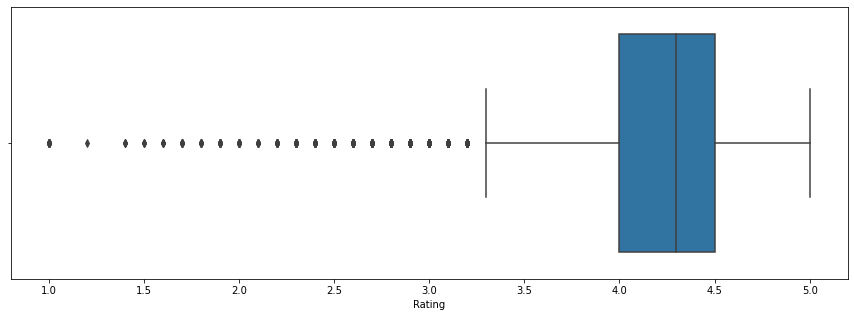

In [19]:
#Lets do the box plot :

plt.figure(figsize = (15,5))
sns.boxplot(playstore_df['Rating'], x='Rating')

Now, its in range 

In [20]:
#lets see the describe() for the rating column:
playstore_df['Rating'].isnull().sum()

1474

"Rating" contain 1474 null values which is greater compare to other columns.


Lets replace this null values using median or mean set values.

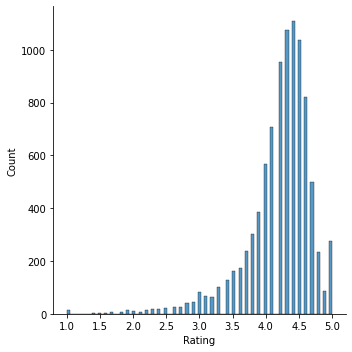

In [21]:
sns.displot(playstore_df['Rating'])

In [22]:
playstore_df['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [23]:
playstore_df['Rating'].fillna(playstore_df['Rating'].median(), inplace= True) #replacing using median()
playstore_df['Rating'].describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

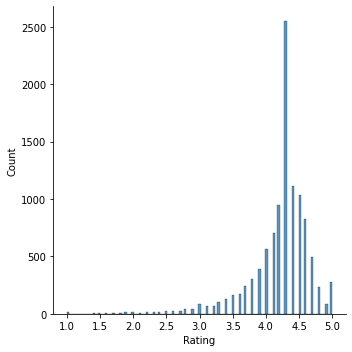

In [24]:
sns.displot(playstore_df['Rating'])

Now let's check the null values present in other columns

In [25]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Few null values present in columns so let's drop them.

In [26]:
playstore_df= playstore_df.dropna()

In [27]:
# Again checking the value of null values
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

All null values are treated then Let's do other cleaning

The following part need to be corrected:

1. In 'Reviews' column datatype should be float
2. In 'Size' column convert KB to MB
3. There are $ symbols in the 'price' column and those must be removed
4. In 'installs' column , '+' sign should be removed
5. Duplicates values should be removed.

Now Let's change the datatype of Reviews

In [28]:
playstore_df['Reviews'].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [29]:
#Lets change the type of the Reviews.Int type is the best option.

playstore_df['Reviews'] = playstore_df['Reviews'].astype('int')
playstore_df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

1. popular app - rating and in which age group 
2. genre wise , 
3.current ver. vs andriod ver.
4. how many app in each category or geners
5.rating vs category or geners
6.size vs installation